In [16]:
import transformers
import torch
import PIL
import matplotlib

In [17]:
c = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
v = transformers.ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")
params = lambda m: sum(p.numel() for p in m.parameters())

In [27]:
print(c)

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [18]:
from datasets import load_dataset

ds = load_dataset("nlphuji/flickr30k")

In [19]:
print(ds.keys())

dict_keys(['test'])


In [20]:

print(f"Number of examples in test: {len(ds['test'])}")

Number of examples in test: 31014


In [21]:
ds['test'].features  # this is a PIL image

{'image': Image(mode=None, decode=True, id=None),
 'caption': [Value(dtype='string', id=None)],
 'sentids': [Value(dtype='string', id=None)],
 'split': Value(dtype='string', id=None),
 'img_id': Value(dtype='string', id=None),
 'filename': Value(dtype='string', id=None)}

In [22]:
ds['test']['filename'][0:5]
print(ds)

DatasetDict({
    test: Dataset({
        features: ['image', 'caption', 'sentids', 'split', 'img_id', 'filename'],
        num_rows: 31014
    })
})


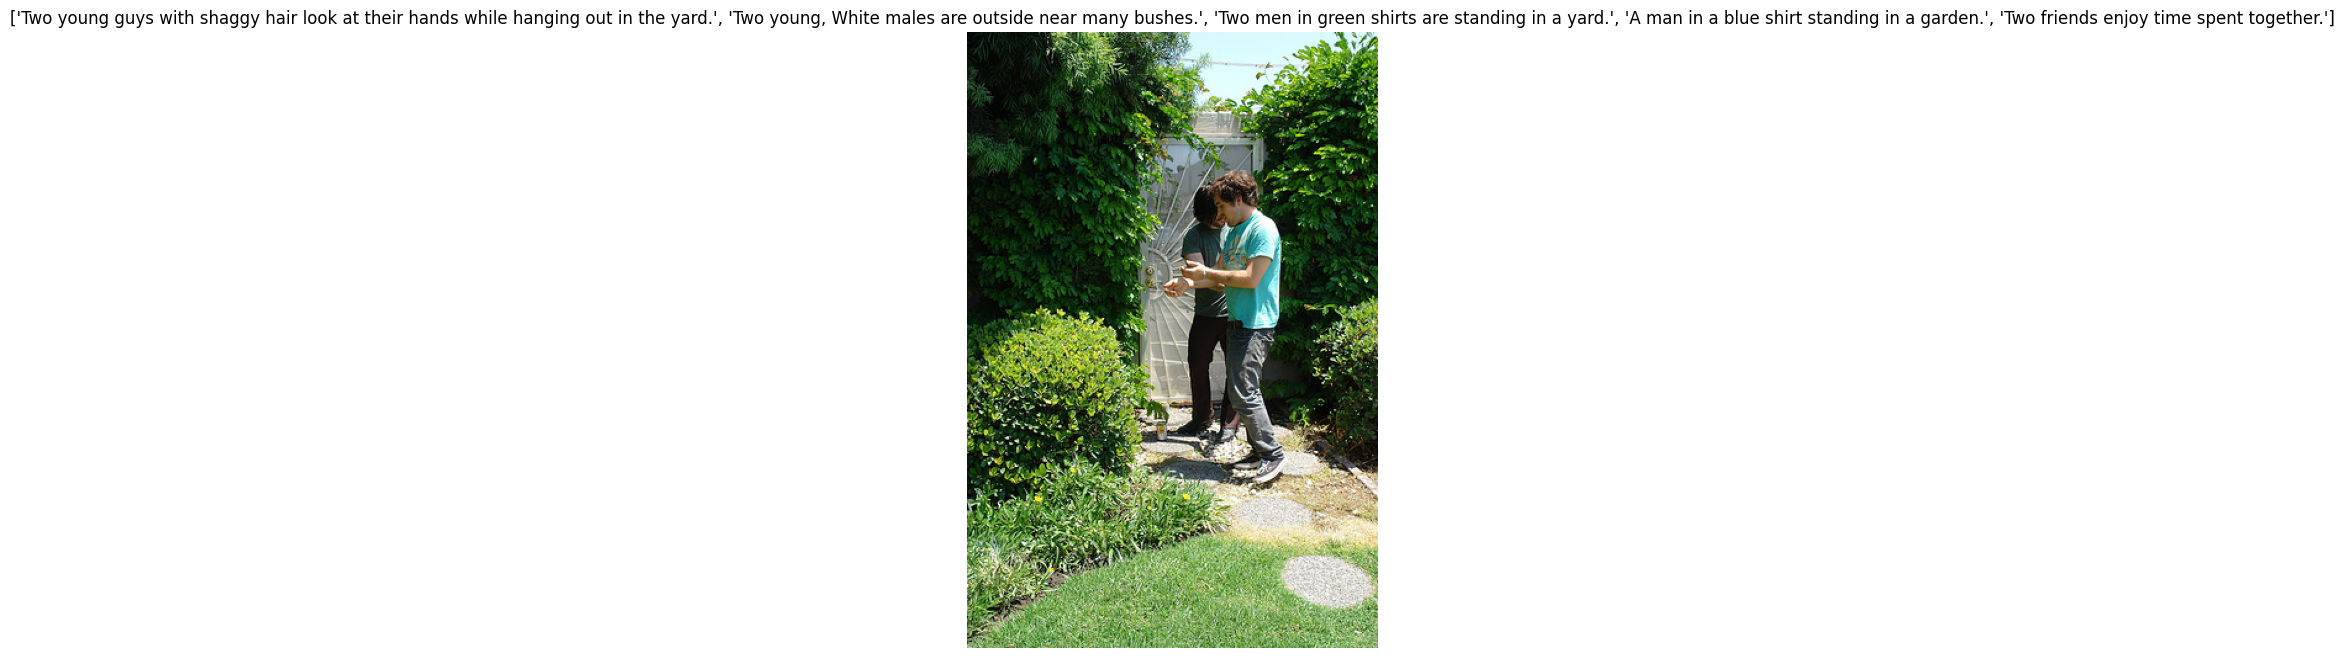

Image shape: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image dimensions: (333, 500)


In [26]:
import matplotlib.pyplot as plt
from PIL import Image

# Display an image with its captions
example = ds['test'][0]
img = example['image']
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')

# Show captions if available
if 'captions' in example:
    all_captions = example['captions']
    caption_text = "\n".join([f"{i+1}. {cap}" for i, cap in enumerate(all_captions)])
elif 'caption' in example:
    caption_text = example['caption']
else:
    caption_text = "No caption available"

plt.title(caption_text[:100] + "..." if len(caption_text) > 100 else caption_text)
plt.show()

print("Image shape:", type(img))
if hasattr(img, 'size'):
    print("Image dimensions:", img.size)